# IPL 2024 RCB Vs DC Analysis

The columns in the dataset provide information about various aspects of the delivery, the players involved, and the results of that delivery. Below is a description of each column in the dataset:

1. **team:** The name of the batting team for the particular delivery.
2. **over:** The over number in which the delivery was bowled.
3. **batter:** The name of the batsman facing the delivery.
4. **bowler:** The name of the bowler delivering the ball.
5. **non_striker:** The name of the batsman at the non-striker’s end.
6. **runs_batter:** The number of runs scored by the batsman from the delivery.
7. **runs_extras:** The number of extra runs (wides, no-balls, byes, or leg-byes) conceded during the delivery.
8. **runs_total:** The total number of runs scored from the delivery (sum of runs_batter and runs_extras).
9. **player_out:** The name of the player who got out on the delivery, if any.
10. **wicket_kind:** The manner in which the batsman got out (e.g., bowled, caught, run out).
11. **fielders:** A list of fielders involved in the dismissal, if applicable.

In [2]:
import pandas as pd
deliveries_df = pd.read_csv("innings_deliveries.csv")

print(deliveries_df.head())

                          team  over        batter    bowler   non_striker  \
0  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   
1  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   
2  Royal Challengers Bengaluru     0  F du Plessis  I Sharma       V Kohli   
3  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   
4  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   

   runs_batter  runs_extras  runs_total player_out wicket_kind fielders  
0            0            0           0        NaN         NaN       []  
1            1            0           1        NaN         NaN       []  
2            1            0           1        NaN         NaN       []  
3            0            0           0        NaN         NaN       []  
4            2            0           2        NaN         NaN       []  


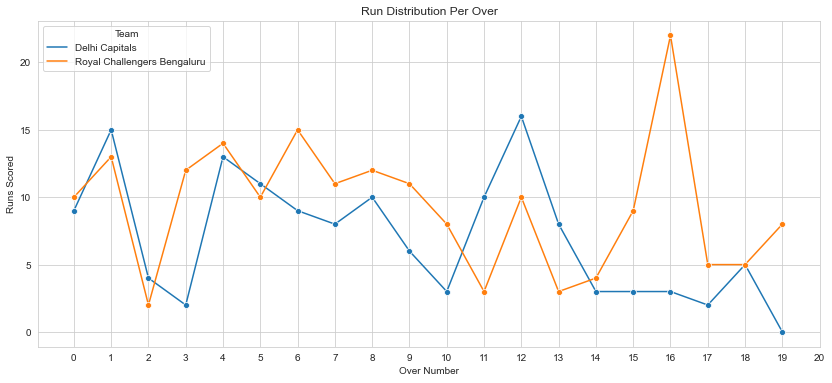

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# data preparation for run distribution per over
run_distribution = deliveries_df.groupby(['team', 'over']).agg({'runs_total': 'sum'}).reset_index()

# plotting run distribution per over for both teams
plt.figure(figsize=(14, 6))
sns.lineplot(data=run_distribution, x='over', y='runs_total', hue='team', marker='o')
plt.title('Run Distribution Per Over')
plt.xlabel('Over Number')
plt.ylabel('Runs Scored')
plt.xticks(range(0, 21))  # over numbers from 0 to 20
plt.legend(title='Team')
plt.show()

The plot above shows the run distribution per over for both teams. Here are some insights:

- The scoring rate for each team shows fluctuations throughout their innings, with spikes indicating overs with high scoring, likely due to boundaries or big hits.
- Royal Challengers Bangalore (RCB) appears to have a couple of overs with significantly higher runs, suggesting aggressive batting.

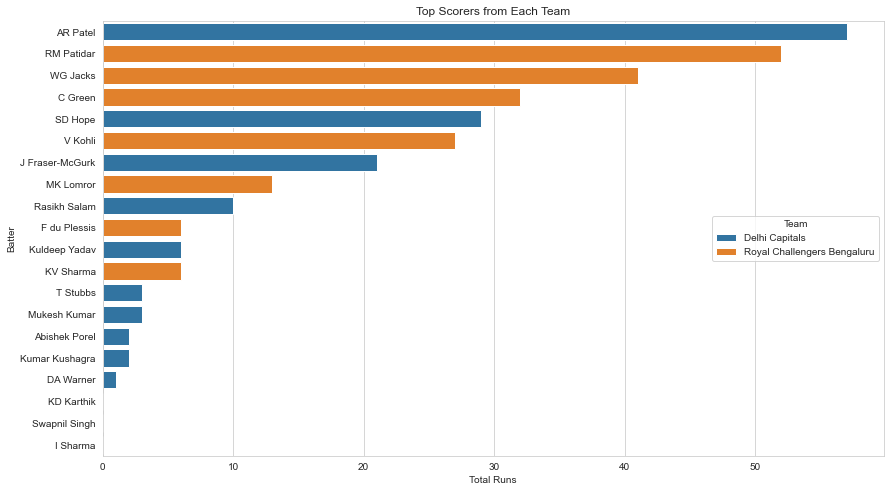

In [4]:
# calculating top scorers for each team
top_scorers = deliveries_df.groupby(['team', 'batter']).agg({'runs_batter': 'sum'}).reset_index().sort_values(by='runs_batter', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_scorers, x='runs_batter', y='batter', hue='team', dodge=False)
plt.title('Top Scorers from Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.legend(title='Team', loc='center right')
plt.show()

Key observations from the graph include:

- **AR Patel** from Delhi Capitals is the top scorer of the match, significantly outscoring others with a little over 50 runs.
- **RM Patidar** is the top scorer for Royal Challengers Bangalore, closely approaching 50 runs.
The graph displays a diverse contribution from both teams, with several players from both sides contributing notable scores.

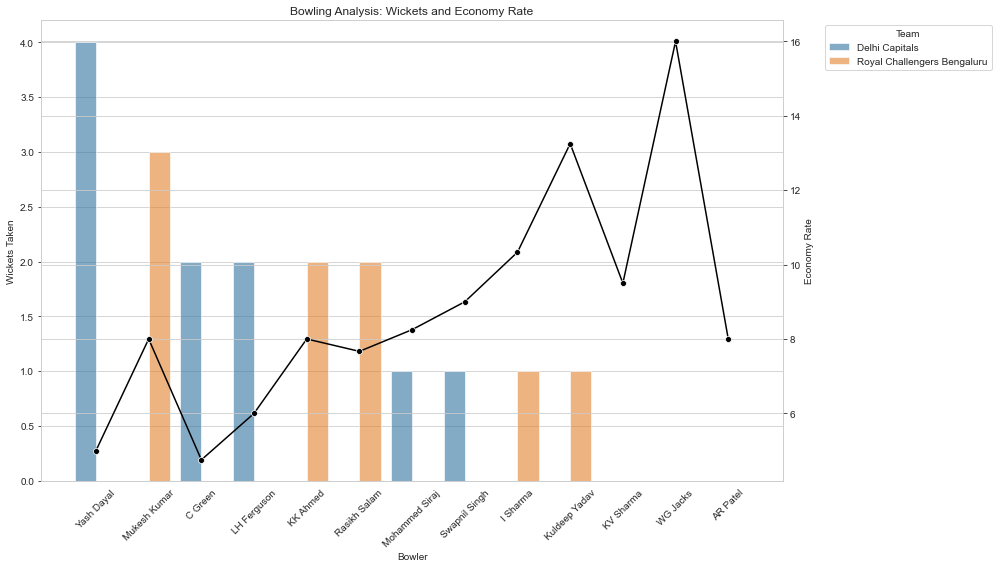

In [5]:
# preparing data for bowling analysis
deliveries_df['wickets_taken'] = deliveries_df['wicket_kind'].notna().astype(int)
bowling_stats = deliveries_df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()

# calculating economy rate (total runs conceded / number of overs bowled)
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']

# sorting the data for better visualization
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

# prepare the DataFrame for plotting
bowling_stats_sorted['wickets_taken'] = deliveries_df['wicket_kind'].notna().astype(int)
bowling_stats = deliveries_df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

# create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for wickets
sns.barplot(data=bowling_stats_sorted, x='bowler', y='wickets_taken', hue='team', ax=ax1, alpha=0.6)
ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('Bowler')
ax1.set_title('Bowling Analysis: Wickets and Economy Rate')
ax1.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

for item in ax1.get_xticklabels():
    item.set_rotation(45)

ax2 = ax1.twinx()
sns.lineplot(data=bowling_stats_sorted, x='bowler', y='economy_rate', marker='o', sort=False, ax=ax2, color='black')
ax2.set_ylabel('Economy Rate')

plt.tight_layout()
plt.show()

The combined bar and line plot provides a comprehensive overview of the bowling performance of each team:

- **Wickets Taken:** The bars indicate the number of wickets each bowler took during the match. The height of the bars reflects how successful the bowlers were in terms of taking wickets. Bowlers from both teams contributed to taking wickets, with some notable performances that stand out due to higher bars.
- **Economy Rate:** The line graph overlaid on the bar graph shows the economy rate (number of runs conceded per over) of each bowler. The economy rate is crucial as it indicates how economically a bowler has bowled in terms of runs given away.

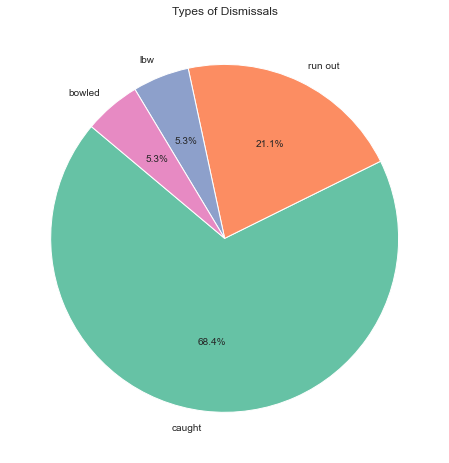

In [6]:
dismissal_types = deliveries_df['wicket_kind'].dropna().value_counts()

plt.figure(figsize=(8, 8))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Types of Dismissals')
plt.show()

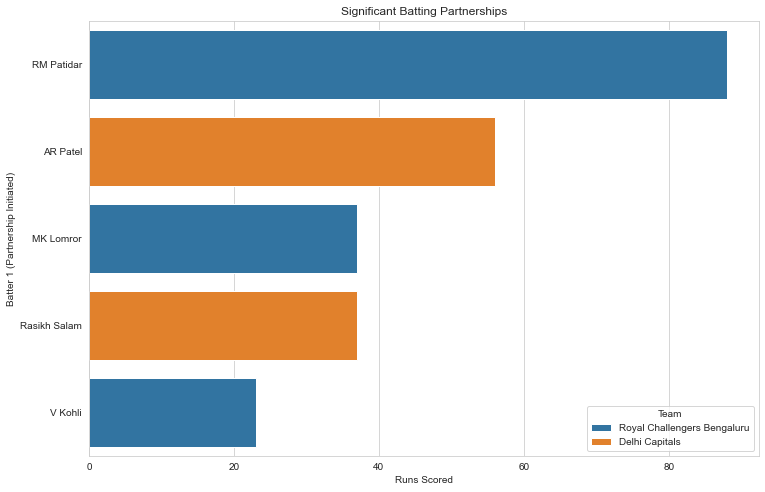

In [7]:
# function to calculate partnerships
def calculate_partnerships(df):
    partnerships = []
    current_partnership = {}
    for i, row in df.iterrows():
        if i == 0 or (row['batter'] not in current_partnership.values()):
            if current_partnership:
                partnerships.append(current_partnership)
            current_partnership = {
                'team': row['team'],
                'batter1': row['batter'],
                'batter2': row['non_striker'],
                'runs': 0,
                'balls': 0
            }
        current_partnership['runs'] += row['runs_total']
        current_partnership['balls'] += 1
        if 'player_out' in row and pd.notna(row['player_out']):
            if row['player_out'] == current_partnership['batter1'] or row['player_out'] == current_partnership['batter2']:
                partnerships.append(current_partnership)
                current_partnership = {}
    # append the last partnership if not ended by a wicket
    if current_partnership:
        partnerships.append(current_partnership)
    return partnerships

# calculate partnerships
partnerships_data = calculate_partnerships(deliveries_df)
partnerships_df = pd.DataFrame(partnerships_data)

# filter out significant partnerships (e.g., partnerships with more than 20 runs)
significant_partnerships = partnerships_df[partnerships_df['runs'] > 20]

# sort by highest runs
significant_partnerships = significant_partnerships.sort_values(by='runs', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=significant_partnerships, x='runs', y='batter1', hue='team', dodge=False)
plt.title('Significant Batting Partnerships')
plt.xlabel('Runs Scored')
plt.ylabel('Batter 1 (Partnership Initiated)')
plt.legend(title='Team')
plt.show()

The bar chart displays significant batting partnerships from the match, highlighting partnerships that scored more than 20 runs. Here’s how these insights contribute to our analysis:

- The chart identifies key partnerships that likely had a substantial impact on the match’s outcome, illustrating the effectiveness of batting pairs.
- It provides insights into which players were involved in pivotal stands, which can help in assessing player form and team strategy.

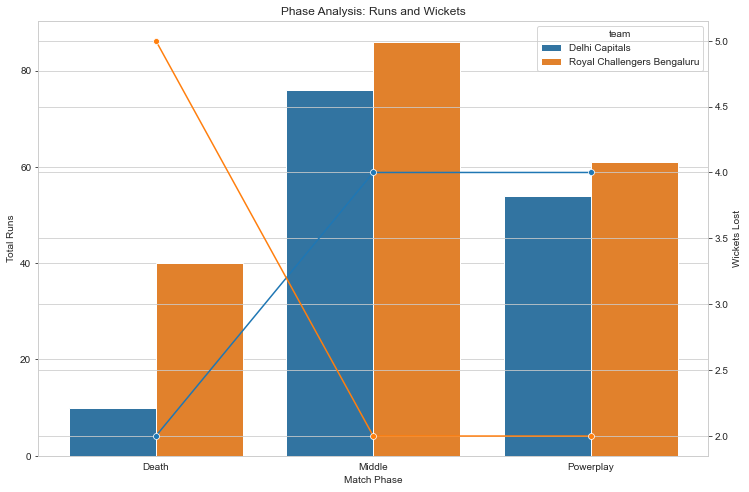

In [8]:
# function to classify the phase of the game based on the over number
def classify_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 16:
        return 'Middle'
    else:
        return 'Death'

# adding phase information to the dataframe
deliveries_df['phase'] = deliveries_df['over'].apply(classify_phase)

# grouping data by phase and team to calculate runs and wickets
phase_analysis = deliveries_df.groupby(['team', 'phase']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'count'}).rename(columns={'over': 'balls'}).reset_index()

# calculating the run rate
phase_analysis['run_rate'] = (phase_analysis['runs_total'] / phase_analysis['balls']) * 6

# plotting the phase analysis
fig, ax1 = plt.subplots(figsize=(12, 8))

# bar plot for runs scored in each phase
sns.barplot(data=phase_analysis, x='phase', y='runs_total', hue='team', ax=ax1)
ax1.set_title('Phase Analysis: Runs and Wickets')
ax1.set_ylabel('Total Runs')
ax1.set_xlabel('Match Phase')

# line plot for wickets lost
ax2 = ax1.twinx()
sns.lineplot(data=phase_analysis, x='phase', y='wickets_taken', hue='team', marker='o', ax=ax2, legend=False)
ax2.set_ylabel('Wickets Lost')

plt.show()

The plot above provides a clear breakdown of the match into different phases; Powerplay, Middle, and Death, and illustrates how each team performed during these segments:

- **Powerplay:** Both teams have a relatively low total of runs, with RCB losing more wickets than DC in this phase, as indicated by the height of the orange line.
- **Middle:** This phase shows the highest run-scoring for both teams, with DC scoring slightly more than RCB. The wickets lost remain controlled, suggesting stable innings from both teams.
- **Death:** RCB has a sharp decrease in runs compared to the Middle phase, while DC maintains a high run rate. Wickets lost by RCB increased significantly in this phase, marked by the orange line peaking near 4.5, indicating a possible collapse or aggressive batting that did not pay off.

In [9]:
# calculate runs and balls faced for each batter
batter_stats = deliveries_df.groupby('batter').agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()

# calculate strike rate for each batter (runs per 100 balls)
batter_stats['strike_rate'] = (batter_stats['runs_batter'] / batter_stats['balls_faced']) * 100

# sorting batters by their strike rate
batter_stats_sorted = batter_stats.sort_values(by='strike_rate', ascending=False)

# displaying calculated strike rates along with runs scored and balls faced
batter_stats_sorted.head(10)

,batter,runs_batter,balls_faced,strike_rate
6,J Fraser-McGurk,21,8,262.500000
18,V Kohli,27,14,192.857143
13,RM Patidar,52,34,152.941176
8,KV Sharma,6,4,150.000000
0,AR Patel,57,40,142.500000
19,WG Jacks,41,30,136.666667
2,C Green,32,24,133.333333
11,MK Lomror,13,10,130.000000
15,SD Hope,29,24,120.833333
4,F du Plessis,6,7,85.714286


Here are the top performers in terms of strike rate from the match:

1. J Fraser-McGurk had the highest strike rate at 262.50, scoring 21 runs from just 8 balls.
2. Virat Kohli also scored efficiently, with a strike rate of 192.86, making 27 runs from 14 balls.
3. Rajat Patidar contributed significantly with a strike rate of 152.94, accumulating 52 runs from 34 balls.

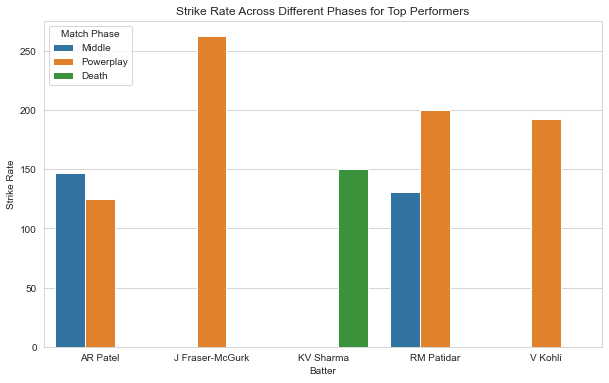

In [10]:
# merging phase information with batter stats
batter_phase_stats = deliveries_df.groupby(['batter', 'phase']).agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()

# calculate strike rate for each batter-phase combination
batter_phase_stats['strike_rate'] = (batter_phase_stats['runs_batter'] / batter_phase_stats['balls_faced']) * 100

# filtering for top performers based on overall strike rate
top_performers = batter_stats_sorted.head(5)['batter']
batter_phase_stats_top = batter_phase_stats[batter_phase_stats['batter'].isin(top_performers)]

# plotting strike rate across different phases for top performers
plt.figure(figsize=(10, 6))
sns.barplot(data=batter_phase_stats_top, x='batter', y='strike_rate', hue='phase')
plt.title('Strike Rate Across Different Phases for Top Performers')
plt.xlabel('Batter')
plt.ylabel('Strike Rate')
plt.legend(title='Match Phase')
plt.show()

The bar chart illustrates how the strike rates of the top performers varied across different phases of the match:

- **J Fraser-McGurk** stands out with a particularly high strike rate in the Middle phase, significantly higher than any other phase or player, suggesting a highly aggressive and effective batting performance during this part of the innings.
- **V Kohli and RM Patidar** both have high strike rates in the Death phase, indicating their ability to accelerate scoring towards the end of the innings, which is crucial for setting or chasing targets.
- **AR Patel** shows consistency in the Powerplay and Middle phases with a slightly reduced but still competitive strike rate, indicating his role as a steady opener or middle-order batter.
- **KV Sharma** exhibits a lower strike rate in the Middle phase compared to others, suggesting a more conservative approach during this phase or difficulty in accelerating.

## Identifying Turning Points of the Match
To identify the turning point where Delhi Capitals (DC) might have lost the game and Royal Challengers Bangalore (RCB) gained the upper hand, we can analyze the cumulative run rate comparison throughout the innings and look at wicket fall events. Specifically, we can:

1. **Compare Cumulative Run Rates:** Plot the cumulative run rates of both teams throughout their innings to see where RCB started to outpace DC significantly.
2. **Wicket Analysis:** Examine the timings and impacts of wicket falls on the scoring rate and momentum for DC.
3. **High-Impact Overs:** Identify any overs where RCB took multiple wickets or DC had a significantly low scoring rate, which could indicate a loss of momentum.

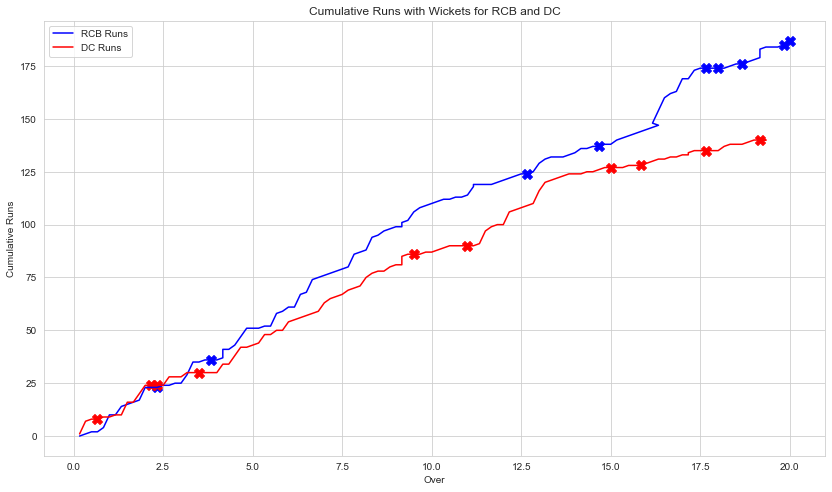

In [15]:
# Calculate cumulative runs and wickets for each ball for both teams
deliveries_df['cumulative_runs'] = deliveries_df.groupby('team')['runs_total'].cumsum()
deliveries_df['cumulative_wickets'] = deliveries_df.groupby('team')['wickets_taken'].cumsum()

# Separate data for both teams
rcb_deliveries = deliveries_df[deliveries_df['team'] == 'Royal Challengers Bengaluru'].copy()
dc_deliveries = deliveries_df[deliveries_df['team'] == 'Delhi Capitals'].copy()

# Calculating overs for cumulative analysis
rcb_deliveries['over_ball'] = rcb_deliveries['over'] + (rcb_deliveries.groupby('over').cumcount() + 1) / 6
dc_deliveries['over_ball'] = dc_deliveries['over'] + (dc_deliveries.groupby('over').cumcount() + 1) / 6

# Plotting cumulative run rates and wickets
fig, ax = plt.subplots(figsize=(14, 8))

# Plot for RCB
ax.plot(rcb_deliveries['over_ball'].values, rcb_deliveries['cumulative_runs'].values, color='blue', label='RCB Runs')

# Plotting wickets for RCB (convert to numpy arrays for indexing)
wickets_rcb = rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]
ax.scatter(wickets_rcb['over_ball'].values, wickets_rcb['cumulative_runs'].values, color='blue', marker='X', s=100)

# Plot for DC
ax.plot(dc_deliveries['over_ball'].values, dc_deliveries['cumulative_runs'].values, color='red', label='DC Runs')

# Plotting wickets for DC (convert to numpy arrays for indexing)
wickets_dc = dc_deliveries[dc_deliveries['wickets_taken'] == 1]
ax.scatter(wickets_dc['over_ball'].values, wickets_dc['cumulative_runs'].values, color='red', marker='X', s=100)

ax.set_title('Cumulative Runs with Wickets for RCB and DC')
ax.set_xlabel('Over')
ax.set_ylabel('Cumulative Runs')
ax.legend()
plt.show()


The plot shows the cumulative runs scored by each team throughout their innings, with markers indicating wickets:

- **Momentum Shifts:** The points where wickets are lost are crucial. Despite wickets, RCB’s run line does not show any drastic downturns, suggesting effective recovery by subsequent batters.
- **Performance Analysis:** RCB’s ability to keep the run rate up despite losing wickets might indicate deeper batting strength or successful innings pacing strategies. In contrast, DC, while also increasing their score, does so at a less steep rate, possibly indicating fewer big overs.

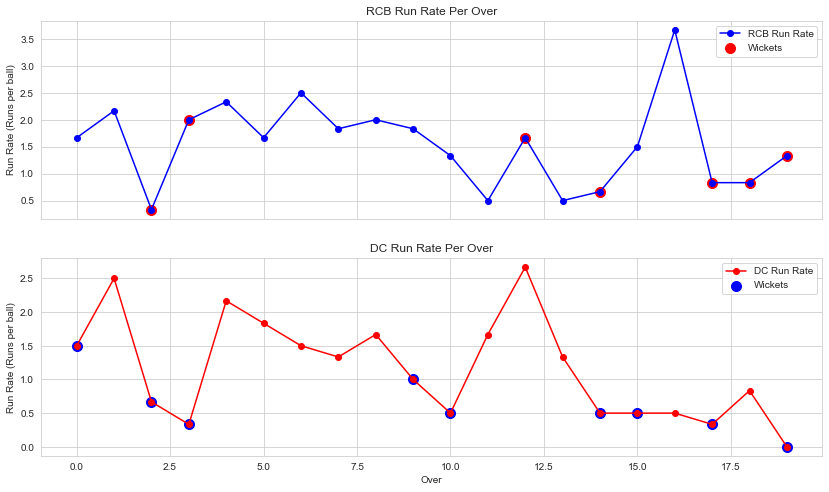

In [17]:
# Calculate runs and wickets per over for both teams
per_over_stats = deliveries_df.groupby(['team', 'over']).agg({'runs_total': 'sum', 'wickets_taken': 'sum'}).reset_index()

# Calculate run rate for each over
per_over_stats['run_rate'] = per_over_stats['runs_total'] / 6  # Runs per over to runs per ball (standard rate)

# Separate data for RCB and DC for plotting
rcb_per_over_stats = per_over_stats[per_over_stats['team'] == 'Royal Challengers Bengaluru']
dc_per_over_stats = per_over_stats[per_over_stats['team'] == 'Delhi Capitals']

# Plotting run rates and marking wickets for each team
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# RCB
ax1.plot(rcb_per_over_stats['over'].values, rcb_per_over_stats['run_rate'].values, marker='o', color='blue', label='RCB Run Rate')
# Filter and plot wickets (convert to numpy arrays to avoid multi-dimensional indexing)
wickets_rcb = rcb_per_over_stats[rcb_per_over_stats['wickets_taken'] > 0]
ax1.scatter(wickets_rcb['over'].values, wickets_rcb['run_rate'].values, color='red', s=100, label='Wickets')
ax1.set_title('RCB Run Rate Per Over')
ax1.set_ylabel('Run Rate (Runs per ball)')
ax1.legend()

# DC
ax2.plot(dc_per_over_stats['over'].values, dc_per_over_stats['run_rate'].values, marker='o', color='red', label='DC Run Rate')
# Filter and plot wickets (convert to numpy arrays to avoid multi-dimensional indexing)
wickets_dc = dc_per_over_stats[dc_per_over_stats['wickets_taken'] > 0]
ax2.scatter(wickets_dc['over'].values, wickets_dc['run_rate'].values, color='blue', s=100, label='Wickets')
ax2.set_title('DC Run Rate Per Over')
ax2.set_xlabel('Over')
ax2.set_ylabel('Run Rate (Runs per ball)')
ax2.legend()

plt.show()


The plotted run rates for each over, along with the moments when wickets were taken (marked with large dots), provide insights into how the match’s dynamics evolved:

- **RCB Run Rate Fluctuations:** RCB’s run rate shows significant fluctuations, peaking at around 3.5 runs per ball towards the end of the innings. The presence of wicket markers (red circles) indicates that wickets were taken during overs where the run rate was generally lower, which is typical as wickets tend to disrupt batting flow.
- **DC Run Rate Patterns:** DC’s run rate starts strong but sees a sharp decline after the initial overs, stabilizing somewhat in the middle before another peak and subsequent fall towards the end. Wickets (blue circles) are taken in overs where the run rate drops, suggesting effective bowling from RCB during these times.